In [1]:
%pip install boto3
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import boto3
import pandas as pd 
import matplotlib
import io
import plotly
import matplotlib.pyplot as plt

In [3]:
s3 = boto3.client('s3')
s3_resource = boto3.resource('s3')
bucket = s3_resource.Bucket('pranathi-sentiment')
object_key = 'final_classification.csv'
bucket_name = 'pranathi-sentiment'
csv_obj = s3.get_object(Bucket=bucket_name, Key=object_key)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')
df_sentiment = pd.read_csv(io.StringIO(csv_string))

In [4]:
s3 = boto3.client('s3')
s3_resource = boto3.resource('s3')
bucket = s3_resource.Bucket('thiyaghessan-wsb')
object_key = 'wsb_batch_2.csv'
bucket_name = 'thiyaghessan-wsb'
csv_obj = s3.get_object(Bucket=bucket_name, Key=object_key)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_total = pd.read_csv(io.StringIO(csv_string))

In [5]:
df_total.drop(df_total.tail(1).index,inplace=True)
df_total = df_total.iloc[:, :-1]
df_total = df_total.reset_index()

In [6]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

In [7]:
df_sentiment.rename({'class': 'class_'}, axis=1, inplace=True)
df_sentiment = encode_and_bind(df_sentiment, 'class_')
df_sentiment.class_ = pd.Categorical(df_sentiment.class_)

def applyFunc(class_):
    if class_ == 'neutral':
        return 0
    elif class_ == 'negative':
        return -1
    elif class_ == 'positive':
        return 1

df_sentiment['B'] = df_sentiment['class_'].apply(applyFunc)
df_sentiment2 = (df_sentiment.groupby(['date'], as_index=False).mean())
df_sentiment2 = df_sentiment2.reset_index()
for y in ['class__negative', 'class__neutral', 'class__positive']:
    df_sentiment2[y] = df_sentiment2[y].apply(lambda x: x*100)

<AxesSubplot:title={'center':'Number of Posts Per Sentiment Category'}>

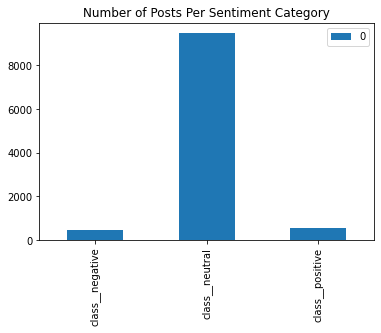

In [8]:
for col in [['class__negative', 'class__neutral', 'class__positive']]:
    columns_count = []
    columns_count.append(df_sentiment[col].sum())
columns_count_df = pd.DataFrame(columns_count)
columns_count_df = columns_count_df.transpose()
columns_count_df.plot.bar(title='Number of Posts Per Sentiment Category')

In [28]:
df_sentiment2 = (df_sentiment.groupby(['date'], as_index=False).mean())
df_sentiment2 = df_sentiment2.reset_index()
for y in ['class__negative', 'class__positive']:
    df_sentiment2[y] = df_sentiment2[y].apply(lambda x: x*100)

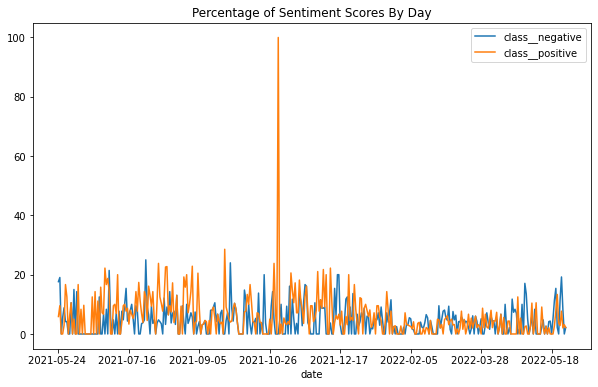

In [30]:
df_sentiment2.plot('date',['class__negative', 'class__positive'], 
                   figsize=(10, 6), title='Percentage of Sentiment Scores By Day');

In [11]:
df_sentiment = df_sentiment.reset_index()
df = df_total.merge(df_sentiment, on='index')

In [12]:
def create_grouped(column):
    new_df = df[[column, 'B']]
    new_df.insert(0, 'count', 1)
    
    convert_dict = {column: str,
                'B': float,
                'count':int
               }
  
    new_df = new_df.astype(convert_dict)
    return new_df.groupby(column).agg({'count':'sum', 'B':'mean'})

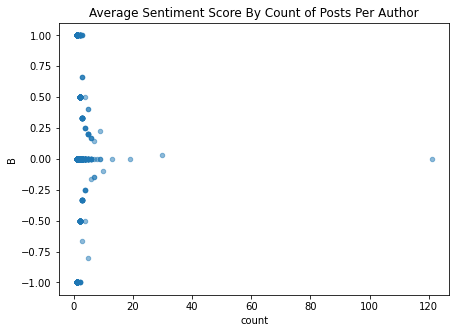

In [13]:
new_author_df = create_grouped('author')
new_author_df.plot.scatter('count', 'B',
                           alpha=0.5, 
                           figsize=(7, 5), 
                           title="Average Sentiment Score By Count of Posts Per Author");

In [32]:
new_category_df = create_grouped('category')
new_category_df.plot.bar('category', 'B',
                             figsize=(7, 5), 
                             title="Average Sentiment Score By Count of Posts Per Category");

KeyError: 'category'

In [15]:
df.columns

Index(['index', 'link', 'title', 'text', 'author', 'category', 'n_comments',
       'upvotes', 'upvote_ratio', 'n_awards', 'class_', 'date',
       'class__negative', 'class__neutral', 'class__positive', 'B'],
      dtype='object')

<AxesSubplot:title={'center':'Number of Posts By Date'}, xlabel='date'>

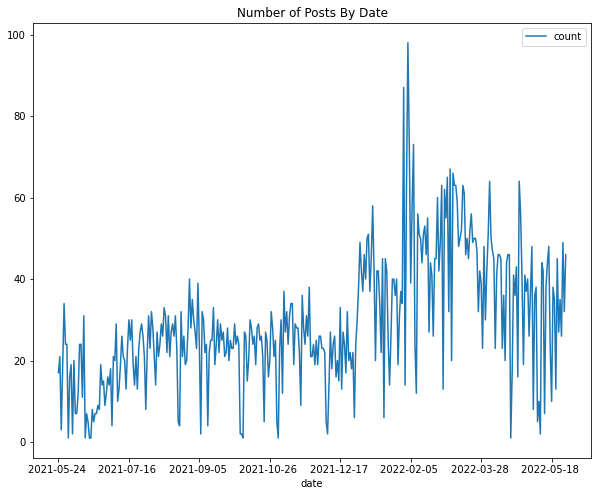

In [16]:
new_date_df = create_grouped('date')
new_date_df = new_date_df.reset_index()
new_date_df.plot( 'date' , 'count', 
                 figsize=(10,8), 
                 title='Number of Posts By Date')

<AxesSubplot:title={'center':'Average Sentiment Score By Number of Comments'}, xlabel='n_comments', ylabel='B'>

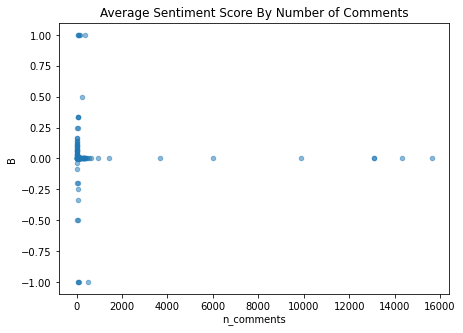

In [17]:
comments_df = create_grouped('n_comments')
comments_df = comments_df.reset_index()


convert_dict = {'n_comments': int,
                'B': float,
                'count':int
               }
  
comments_df = comments_df.astype(convert_dict)
comments_df.plot.scatter('n_comments', 'B', 
                         alpha=0.5, 
                         figsize=(7, 5), 
                         title='Average Sentiment Score By Number of Comments')

In [18]:
df

,index,link,title,text,author,category,n_comments,upvotes,upvote_ratio,n_awards,class_,date,class__negative,class__neutral,class__positive,B
0,0,https://www.reddit.com/r/wallstreetbets/commen...,Better Than PancakeBunny[IYKYK],I don't usually share my secret ways of making...,ShillAccountYeet,YOLO,1,1,1,0,neutral,2021-05-24,0,1,0,0
1,1,https://www.reddit.com/r/wallstreetbets/commen...,Historical Post Earnings Moves MEGA Compilatio...,**Historical Post Earnings Moves MEGA Compilat...,FluxRevived,DD,3,1,1,0,neutral,2021-05-24,0,1,0,0
2,2,https://www.reddit.com/r/wallstreetbets/commen...,Whats up with VIAC? am i missing something,Been buying this thing ever since it imploded....,FrozenDeadMonkey,YOLO,2,1,1,0,positive,2021-05-24,0,0,1,1
3,3,https://www.reddit.com/r/wallstreetbets/commen...,Ptn ( Palatin technologies ),What do you guys think about Ptn? There’s a ru...,Frosty_Employee_3922,Discussion,1,1,1,0,negative,2021-05-24,1,0,0,-1
4,4,https://www.reddit.com/r/wallstreetbets/commen...,Elon Doges pitcoin?,Elon Musk played his game one last time...\r\n...,Banksfuckedme,Meme,1,1,1,0,neutral,2021-05-24,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10523,10523,https://www.reddit.com/r/wallstreetbets/commen...,RobinhooD wEek or weAk PickS,[removed],Prior_Weakness2469,YOLO,0,1,1,0,neutral,2022-05-28,0,1,0,0
10524,10524,https://www.reddit.com/r/wallstreetbets/commen...,We hate billionaires... but,Is there any come up story you can concoct tha...,BennySea2,Discussion,0,1,1,0,neutral,2022-05-28,0,1,0,0
10525,10525,https://www.reddit.com/r/wallstreetbets/commen...,Fbï,[removed],Prior_Weakness2469,YOLO,0,1,1,0,neutral,2022-05-28,0,1,0,0
10526,10526,https://www.reddit.com/r/wallstreetbets/commen...,Robinhood agrees to settle customer lawsuit ov...,From the [wsj](https://www.wsj.com/articles/ro...,SpinCharm,News,0,1,1,0,neutral,2022-05-28,0,1,0,0


In [39]:
new_df = df[['date', 'category', 'B', 'class__negative', 'class__neutral', 'class__positive']]
new_df.insert(0, 'count', 1.0)

convert_dict = {'date': str,
                'category': str,
                'B': float,
                'count':int,
                'class__negative': int,
                'class__neutral': int,
                'class__positive': int
               }
  
new_df = new_df.astype(convert_dict)

new_df.groupby(['category', 'date']).agg({'count':'sum', 'class__negative': 'sum',
                'class__neutral': 'sum',
                'class__positive': 'sum'})

count  class__negative  class__neutral  class__positive
category date                                                                
AMA      2022-04-14       1                0               1                0
Chart    2022-05-14       1                0               1                0
         2022-05-22       2                0               1                1
         2022-05-23       3                0               3                0
         2022-05-26       1                0               1                0
...                     ...              ...             ...              ...
YOLO     2022-05-24       1                0               1                0
         2022-05-25       2                2               0                0
         2022-05-26       5                0               5                0
         2022-05-27       1                0               1                0
         2022-05-28       5                0               5                0

[2222 rows x 4 columns]

In [33]:
df.plot.bar('category', 'B')

TypeError: no numeric data to plot

In [35]:
new_category_df = new_category_df.reset_index()

<AxesSubplot:xlabel='category'>

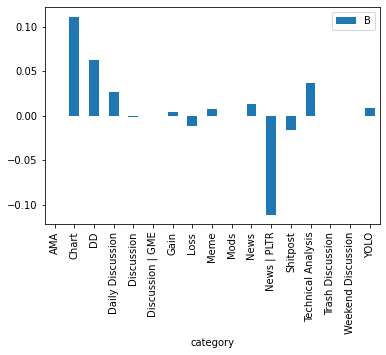

In [36]:
new_category_df.plot.bar('category', 'B')

In [37]:
new_category_df

,category,count,B
0,AMA,1,0.000000
1,Chart,9,0.111111
2,DD,1112,0.062950
3,Daily Discussion,37,0.027027
4,Discussion,5597,-0.001787
5,Discussion | GME,1,0.000000
6,Gain,533,0.003752
7,Loss,272,-0.011029
8,Meme,561,0.007130
9,Mods,1,0.000000


In [ ]:
new_author_df